In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import uproot3 as uproot
import pandas as pd
from tqdm import tqdm

In [2]:
open_data = False
run1_to_3_pred_only = True
open_data_new_file = False
numi_data = False
fake_data_5 = False
fake_data_7 = False
fake_data_8 = False

split_truth_breakdown = False
recalculate_zero_p_scaling_factor = False

In [3]:
extra_variables = [
    "run",
    "subrun",
    "event",
    "nuvtx_diff",
    "showervtx_diff",
    "muonvtx_diff",
    "truth_isCC",
    "truth_vtxInside",
    "truth_nuPdg",
    "truth_nuEnergy",
    "truth_nuIntType",
    "truth_energyInside",
    "weight_spline",
    "weight_cv",
    "weight_lee",
    "event_type",
    "weight",
    "lowEweight"
]

numu_bdt_score_variables = [
    "cosmict_10_score",
    "numu_1_score",
    "numu_2_score"
]

nue_bdt_score_variables = [
    "tro_5_score",
    "tro_4_score",
    "tro_2_score",
    "tro_1_score",
    "stw_4_score",
    "stw_3_score",
    "stw_2_score",
    "sig_2_score",
    "sig_1_score",
    "pio_2_score",
    "lol_2_score",
    "lol_1_score",
    "br3_6_score",
    "br3_5_score",
    "br3_3_score"
]

kine_scalar_vars = [
    "kine_reco_add_energy",
    "kine_pio_mass",
    "kine_pio_flag",
    "kine_pio_vtx_dis",
    "kine_pio_energy_1",
    "kine_pio_theta_1",
    "kine_pio_phi_1",
    "kine_pio_dis_1",
    "kine_pio_energy_2",
    "kine_pio_theta_2",
    "kine_pio_phi_2",
    "kine_pio_dis_2",
    "kine_pio_angle"
]

kine_vector_vars = [
    "kine_energy_particle",
    "kine_energy_info",
    "kine_particle_type",
    "kine_energy_included",
]

In [4]:
bdt_vars = [
    "nc_delta_score",
    "nc_delta_ntrack_score",
    "nc_delta_0track_score",
    "mip_energy",
    "mip_angle_beam", 
    "spt_angle_vertical",
    "nue_score", 
    "numu_score", 
    "nc_pio_score",
    "numu_cc_flag"
]

shower_dQ_dx_vars = ['mip_vec_dQ_dx_0', 'mip_vec_dQ_dx_1', 'mip_vec_dQ_dx_2', 'mip_vec_dQ_dx_3', 'mip_vec_dQ_dx_4', 'mip_vec_dQ_dx_5', 'mip_vec_dQ_dx_6', 'mip_vec_dQ_dx_7','mip_vec_dQ_dx_8', 'mip_vec_dQ_dx_9', 'mip_vec_dQ_dx_10', 'mip_vec_dQ_dx_11','mip_vec_dQ_dx_12', 'mip_vec_dQ_dx_13', 'mip_vec_dQ_dx_14', 'mip_vec_dQ_dx_15','mip_vec_dQ_dx_16', 'mip_vec_dQ_dx_17', 'mip_vec_dQ_dx_18', 'mip_vec_dQ_dx_19']

bdt_vars += shower_dQ_dx_vars

eval_mc_variables = [
    "run",
    "subrun",
    "event",
    "flash_time",
    "weight_spline", # this and remaining only make sense for MC
    "weight_cv",
    "match_completeness_energy",
    "truth_nuEnergy",
    "truth_energyInside",
    "truth_electronInside",
    "truth_nuPdg",
    "truth_isCC",
    "truth_isFC",
    "truth_vtxInside",
    "truth_vtxX",
    "truth_vtxY",
    "truth_vtxZ",
    "truth_nuTime",
    "flash_measPe",
    "flash_predPe",
]

eval_data_variables = [
    "run",
    "subrun",
    "event",
    "flash_time",
    "flash_measPe",
    "flash_predPe",
]


pf_eval_mc_variables = [
    "truth_NprimPio",
    "truth_NCDelta",
    "nuvtx_diff",
    "showervtx_diff",
    "reco_showerKE",
    "truth_pio_energy_1",
    "truth_pio_energy_2",
    "reco_nuvtxX",
    "reco_nuvtxY",
    "reco_nuvtxZ",
    "reco_showervtxX",
    "reco_showervtxY",
    "reco_showervtxZ",
    "reco_protonMomentum",
    #"reco_showerMomentum"
]

pf_eval_data_variables = [ # also use these for dirt
        "reco_showerKE",
        "reco_nuvtxX",
        "reco_nuvtxY",
        "reco_nuvtxZ",
        "reco_showervtxX",
        "reco_showervtxY",
        "reco_showervtxZ",
        "reco_protonMomentum", # Not in numi data file
        #"reco_showerMomentum", # Not in the data file from processed_checkout_rootfiles, I think Wenqiang is currently separating it from the 7e20.
        #For now just use mip_angle_beam and spt_angle_vertical
]

dedicated_pf_eval_mc_variables = [
    "truth_pdg", 
    "truth_mother", 
    "truth_startMomentum"
]


In [5]:
f_nu_overlay_run1 = uproot.open("data/checkout_prodgenie_bnb_intrinsic_nue_overlay_run1.root")["wcpselection"]
f_nu_overlay_run1_bdt = f_nu_overlay_run1["T_BDTvars"].pandas.df(bdt_vars, flatten=False)
f_nu_overlay_run1_eval = f_nu_overlay_run1["T_eval"].pandas.df(eval_mc_variables + ["match_isFC"], flatten=False)
f_nu_overlay_run1_pfeval = f_nu_overlay_run1["T_PFeval"].pandas.df(pf_eval_mc_variables, flatten=False)
f_nu_overlay_run1_kine = f_nu_overlay_run1["T_KINEvars"].pandas.df(kine_scalar_vars + kine_vector_vars + ["kine_reco_Enu"], flatten=False)
f_nu_overlay_run1_pot = f_nu_overlay_run1["T_pot"].pandas.df("pot_tor875good", flatten=False)
nu_overlay_run1_POT = np.sum(f_nu_overlay_run1_pot["pot_tor875good"].to_numpy())
nu_overlay_run1_df = pd.concat([f_nu_overlay_run1_bdt, f_nu_overlay_run1_eval, f_nu_overlay_run1_pfeval, f_nu_overlay_run1_kine], axis=1, sort=False)
del f_nu_overlay_run1
del f_nu_overlay_run1_bdt
del f_nu_overlay_run1_eval
del f_nu_overlay_run1_pfeval
del f_nu_overlay_run1_kine
del f_nu_overlay_run1_pot
nu_overlay_run1_df["isEXT"] = [0 for i in range(nu_overlay_run1_df.shape[0])]
nu_overlay_run1_df["isDirt"] = [0 for i in range(nu_overlay_run1_df.shape[0])]
nu_overlay_run1_df["WC_file"] = ["nu_overlay_run1" for i in range(nu_overlay_run1_df.shape[0])]
nu_overlay_run1_df["run_num"] = [1 for i in range(nu_overlay_run1_df.shape[0])]

f_nu_overlay_run2 = uproot.open("data/checkout_prodgenie_bnb_intrinsic_nue_overlay_run2.root")["wcpselection"]
f_nu_overlay_run2_bdt = f_nu_overlay_run2["T_BDTvars"].pandas.df(bdt_vars, flatten=False)
f_nu_overlay_run2_eval = f_nu_overlay_run2["T_eval"].pandas.df(eval_mc_variables + ["match_isFC"], flatten=False)
f_nu_overlay_run2_pfeval = f_nu_overlay_run2["T_PFeval"].pandas.df(pf_eval_mc_variables, flatten=False)
f_nu_overlay_run2_kine = f_nu_overlay_run2["T_KINEvars"].pandas.df(kine_scalar_vars + kine_vector_vars + ["kine_reco_Enu"], flatten=False)
f_nu_overlay_run2_pot = f_nu_overlay_run2["T_pot"].pandas.df("pot_tor875good", flatten=False)
nu_overlay_run2_POT = np.sum(f_nu_overlay_run2_pot["pot_tor875good"].to_numpy())
nu_overlay_run2_df = pd.concat([f_nu_overlay_run2_bdt, f_nu_overlay_run2_eval, f_nu_overlay_run2_pfeval, f_nu_overlay_run2_kine], axis=1, sort=False)
del f_nu_overlay_run2
del f_nu_overlay_run2_bdt
del f_nu_overlay_run2_eval
del f_nu_overlay_run2_pfeval
del f_nu_overlay_run2_kine
del f_nu_overlay_run2_pot
nu_overlay_run2_df["isEXT"] = [0 for i in range(nu_overlay_run2_df.shape[0])]
nu_overlay_run2_df["isDirt"] = [0 for i in range(nu_overlay_run2_df.shape[0])]
nu_overlay_run2_df["WC_file"] = ["nu_overlay_run2" for i in range(nu_overlay_run2_df.shape[0])]
nu_overlay_run2_df["run_num"] = [2 for i in range(nu_overlay_run2_df.shape[0])]

f_nu_overlay_run3 = uproot.open("data/checkout_prodgenie_bnb_intrinsic_nue_overlay_run3.root")["wcpselection"]
f_nu_overlay_run3_bdt = f_nu_overlay_run3["T_BDTvars"].pandas.df(bdt_vars, flatten=False)
f_nu_overlay_run3_eval = f_nu_overlay_run3["T_eval"].pandas.df(eval_mc_variables + ["match_isFC"], flatten=False)
f_nu_overlay_run3_pfeval = f_nu_overlay_run3["T_PFeval"].pandas.df(pf_eval_mc_variables, flatten=False)
f_nu_overlay_run3_kine = f_nu_overlay_run3["T_KINEvars"].pandas.df(kine_scalar_vars + kine_vector_vars + ["kine_reco_Enu"], flatten=False)
f_nu_overlay_run3_pot = f_nu_overlay_run3["T_pot"].pandas.df("pot_tor875good", flatten=False)
nu_overlay_run3_POT = np.sum(f_nu_overlay_run3_pot["pot_tor875good"].to_numpy())
nu_overlay_run3_df = pd.concat([f_nu_overlay_run3_bdt, f_nu_overlay_run3_eval, f_nu_overlay_run3_pfeval, f_nu_overlay_run3_kine], axis=1, sort=False)
del f_nu_overlay_run3
del f_nu_overlay_run3_bdt
del f_nu_overlay_run3_eval
del f_nu_overlay_run3_pfeval
del f_nu_overlay_run3_kine
del f_nu_overlay_run3_pot
nu_overlay_run3_df["isEXT"] = [0 for i in range(nu_overlay_run3_df.shape[0])]
nu_overlay_run3_df["isDirt"] = [0 for i in range(nu_overlay_run3_df.shape[0])]
nu_overlay_run3_df["WC_file"] = ["nu_overlay_run3" for i in range(nu_overlay_run3_df.shape[0])]
nu_overlay_run3_df["run_num"] = [3 for i in range(nu_overlay_run3_df.shape[0])]

In [6]:
all_df = pd.concat([nu_overlay_run1_df, nu_overlay_run2_df, nu_overlay_run3_df], sort=False)

In [7]:
if numi_data:
    normalizing_POT = 2.099e20
    
if open_data_new_file:
    normalizing_POT_run1 = 3.60486e19
    normalizing_POT_run2 = 0.
    normalizing_POT_run3 = 9.10675e+18
if open_data:
    normalizing_POT_run1 = 4.42723e+19
    normalizing_POT_run2 = 0.
    normalizing_POT_run3 = 9.00001e+18
if run1_to_3_pred_only:
    normalizing_POT_run1 = 1.423e20
    normalizing_POT_run2 = 2.541e20
    normalizing_POT_run3 = 2.405e20
elif fake_data_5:
    normalizing_POT_run1 = 7.2432440e+20
    normalizing_POT_run2 = 0.
    normalizing_POT_run3 = 0.
elif fake_data_7:
    normalizing_POT_run1 = 1.82202e+20
    normalizing_POT_run2 = 0.
    normalizing_POT_run3 = 2.01956e+20
elif fake_data_8:
    normalizing_POT_run1 = 1.75661e+20
    normalizing_POT_run2 = 0.
    normalizing_POT_run3 = 1.84677e+20
    
    
weight_cv = all_df["weight_cv"].to_numpy()
weight_spline = all_df["weight_spline"].to_numpy()
is_ext = all_df["isEXT"].to_numpy()
is_dirt = all_df["isDirt"].to_numpy()
is_nc_delta = all_df["truth_NCDelta"].to_numpy() # should give 0 for data (truth_NCDelta==NaN)
is_CC = all_df["truth_isCC"].to_numpy() # should give 0 for data (truth_isCC==NaN)
num_pi0 = all_df["truth_NprimPio"].to_numpy() # should give 0 for data (truth_NprimPio==NaN)

# using processed checkout_rootfiles, so all training events are already removed and we're using the whole files


run_nums = all_df["run_num"].to_numpy()
WC_file_str = all_df["WC_file"].to_numpy()

net_weights = []
for i in tqdm(range(len(weight_cv))):
    weight_temp = weight_cv[i] * weight_spline[i]
    if weight_temp <= 0. or weight_temp > 30. or np.isnan(weight_temp): # something went wrong with the saved weights
        weight_temp = 1.

    if run_nums[i] == 1:
        net_weights.append(weight_temp * normalizing_POT_run1 / nu_overlay_run1_POT)
    elif run_nums[i] == 2:
        net_weights.append(weight_temp * normalizing_POT_run2 / nu_overlay_run2_POT)
    elif run_nums[i] == 3:
        net_weights.append(weight_temp * normalizing_POT_run3 / nu_overlay_run3_POT)

        
all_df["net_weight"] = net_weights

100%|██████████| 426571/426571 [00:03<00:00, 107645.82it/s]


In [8]:
true_nue_FC_df = all_df.query("not (isDirt==1) and not (isEXT==1) and truth_isCC==1 and abs(truth_nuPdg)==12 and kine_reco_Enu > 0 and nue_score > 7 and match_isFC==1")

true_nue_PC_df = all_df.query("not (isDirt==1) and not (isEXT==1) and truth_isCC==1 and abs(truth_nuPdg)==12 and kine_reco_Enu > 0 and nue_score > 7 and match_isFC==0")


In [9]:
b = (60, 60)
r = ((0, 3000), (0, 3000))

remade_res_FC_raw, xedges_, yedges_ = np.histogram2d(true_nue_FC_df["truth_nuEnergy"].to_numpy(), true_nue_FC_df["kine_reco_Enu"].to_numpy(), weights=true_nue_FC_df["net_weight"].to_numpy(), bins=b, range=r)
remade_res_PC_raw, xedges_, yedges_ = np.histogram2d(true_nue_PC_df["truth_nuEnergy"].to_numpy(), true_nue_PC_df["kine_reco_Enu"].to_numpy(), weights=true_nue_PC_df["net_weight"].to_numpy(), bins=b, range=r)


In [10]:
# keeping going here!

nueCC_FC_res = []
nueCC_PC_res = []
for i in range(60):
    for j in range(60):
        nueCC_FC_res.append(remade_res_FC_raw[i][j])
        nueCC_PC_res.append(remade_res_PC_raw[i][j])

bin_centers_x = []
bin_centers_y = []
for i in range(60):
    for j in range(60):
        bin_centers_x.append((i + 0.5) / 60. * 3000.)
        bin_centers_y.append((j + 0.5) / 60. * 3000.)
        
b = (60, 60)
r = ((0, 3000), (0, 3000))

/Users/lmh227/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  after removing the cwd from sys.path.


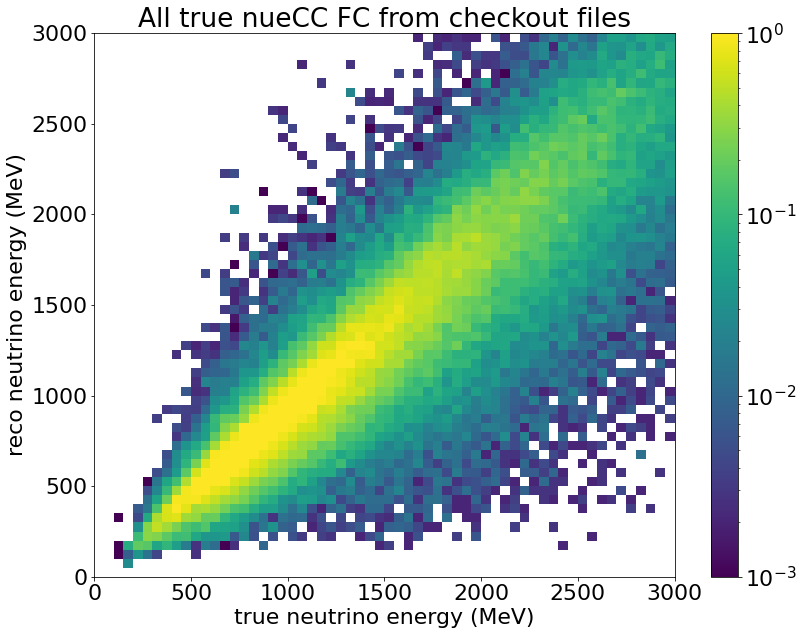

/Users/lmh227/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  if sys.path[0] == '':


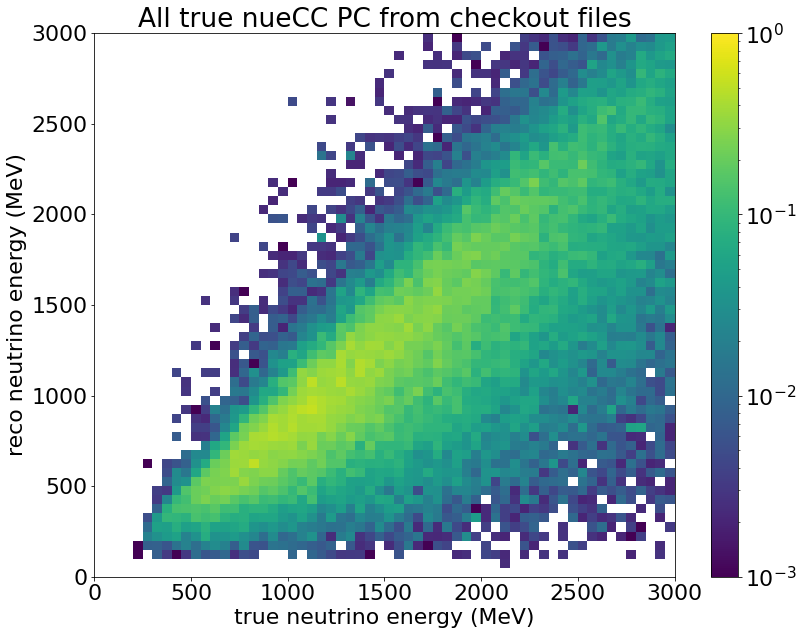

In [11]:
mpl.rcParams.update({'font.size': 22})

plt.figure(figsize=(13,10))
plt.hist2d(bin_centers_x, bin_centers_y, bins=b, range=r, weights=nueCC_FC_res, norm=mpl.colors.LogNorm(), vmin=1e-3, vmax=1)
plt.colorbar()
plt.xlabel("true neutrino energy (MeV)")
plt.ylabel("reco neutrino energy (MeV)")
plt.title("All true nueCC FC from checkout files")
plt.show()

plt.figure(figsize=(13,10))
plt.hist2d(bin_centers_x, bin_centers_y, bins=b, range=r, weights=nueCC_PC_res, norm=mpl.colors.LogNorm(), vmin=1e-3, vmax=1)
plt.colorbar()
plt.xlabel("true neutrino energy (MeV)")
plt.ylabel("reco neutrino energy (MeV)")
plt.title("All true nueCC PC from checkout files")
plt.show()

# matches technote, small changes in vmin and vmax

In [12]:
with open('nue_energy_res_fixed_binning.txt', 'w') as f:
    f.write("""Ereco vs. Etrue (fixed binning)

total bin number = 60, X/Y axis range = [0,3] (GeV)

FC

bin number Etrue, bin number Ereco, number of events in bin

""")
    for i in range(60):
        for j in range(60):
            f.write(f"{i} {j} {nueCC_FC_res[60*i + j]}\n")
            
            
    f.write("""

PC

bin number Etrue, bin number Ereco, number of events in bin

""")
    for i in range(60):
        for j in range(60):
            if i == 59 and j == 59:
                f.write(f"{i} {j} {nueCC_PC_res[60*i + j]}")
            else:
                f.write(f"{i} {j} {nueCC_PC_res[60*i + j]}\n")

